# 5.1 K-means

---

El problema general de agrupar puntos de datos en grupos, donde los puntos de datos en el mismo grupo son más similares que los puntos de datos en diferentes grupos, se conoce como agrupación. Hay una serie de otros enfoques, sobre todo un algoritmo llamado K-means.


Para procesar los datos de aprendizaje, el algoritmo K-means en datos comienza con un primer grupo de centroides seleccionados al azar, que se utilizan como puntos de inicio para cada grupo, y luego realiza cálculos iterativos (repetitivos) para optimizar las posiciones de los centroides. Detiene la creación y optimización de clústeres cuando: Los centroides se han estabilizado: no hay cambios en sus valores porque el agrupamiento se ha realizado correctamente. Se ha alcanzado el número definido de iteraciones.

![pca gif](static/Kmeans.gif)

**Ejemplo1:**
____

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA as skLearnPCA
from sklearn.metrics import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score
pd.set_option('max_colwidth',100)
plt.style.use('seaborn-paper')
plt.style.use('seaborn')

In [7]:
run MvaUtils.py

<Figure size 576x396 with 0 Axes>

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


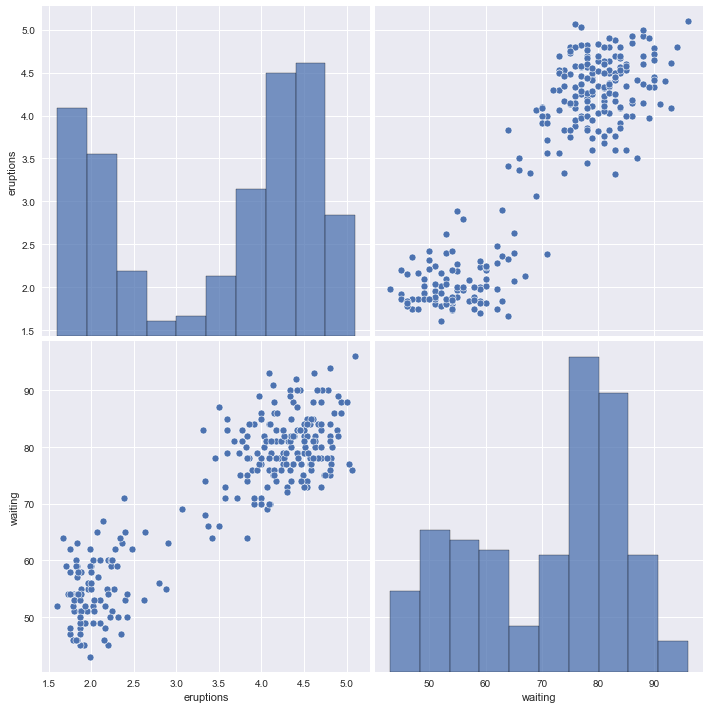

In [8]:
features = ['eruptions','waiting']
# data set de erupciones de geisers
# se tienen mediciones de las erupciones y el tiempo a la siguinete erupcion
eruptions_df = pd.read_csv('DataSets/eruptions.csv')[features]
display(eruptions_df)
sns.pairplot(eruptions_df,size=5);

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,k,inertia
0,1,50440.157025
1,2,8901.768721
2,3,5188.540468
3,4,2946.003237
4,5,2032.393007
5,6,1473.062919
6,7,1009.624011
7,8,802.506945
8,9,662.166029
9,10,536.942879


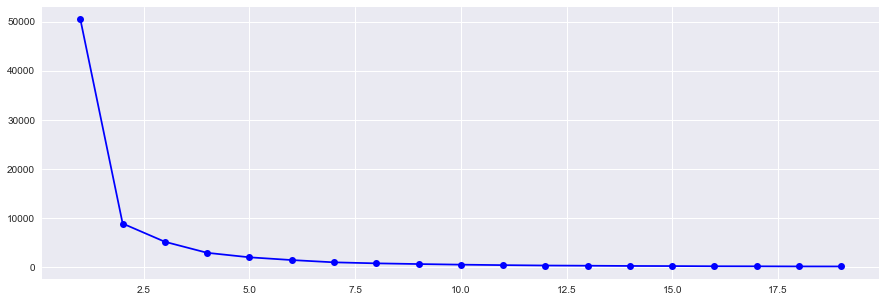

In [9]:
from sklearn.cluster import KMeans
intertias = []
for k in list(range(1,20)): #numero de clusters a medir 
    kmeans = KMeans(n_clusters=k).fit(eruptions_df)
    intertias.append([k,kmeans.inertia_]) # la indercia es la suma de cuadrados de los datos respectoa los centroides

intertias_df = pd.DataFrame(intertias,columns=['k','inertia'])
display(intertias_df)
plt.figure(figsize=(15,5))
plt.plot(intertias_df['k'].values,intertias_df['inertia'].values,'b-o')
plt.show()

Metodo del brazo y codo (inercia o suma de cuadrados), en x está el numero de clusters y en "y" la inercia. Lo que podemos ver con este metodo es que a partir del nuemro de lcusters 2 ya no se aporta demasiado a los resultados

In [10]:
# como ya sabemos que el numero optimo es 2, 
kmeans = KMeans(n_clusters=2).fit(eruptions_df[features])

# se añade la prediccion
eruptions_df['grupo'] = kmeans.predict(eruptions_df[features])
#se añade la cade grupo como prefijo para despues poder hacer un group by
eruptions_df['grupo'] = eruptions_df['grupo'].apply(lambda row: 'grupo_'+str(row))

#bondad de ajuste del agrupamiento
# indice de silhoutte pegado a 1 dice que tanto se parece a su grupo
# si es negativo queire decir que no se parece a su grupo
# se puede interpretar como un porcentaje
eruptions_df['silhouette'] = silhouette_samples(eruptions_df[features], eruptions_df['grupo'])
eruptions_df

,eruptions,waiting,grupo,silhouette
0,3.600,79,grupo_0,0.804396
1,1.800,54,grupo_1,0.813737
2,3.333,74,grupo_0,0.630708
3,2.283,62,grupo_1,0.564083
4,4.533,85,grupo_0,0.796713
...,...,...,...,...
267,4.117,81,grupo_0,0.824602
268,2.150,46,grupo_1,0.738537
269,4.417,90,grupo_0,0.716608
270,1.817,46,grupo_1,0.738929


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


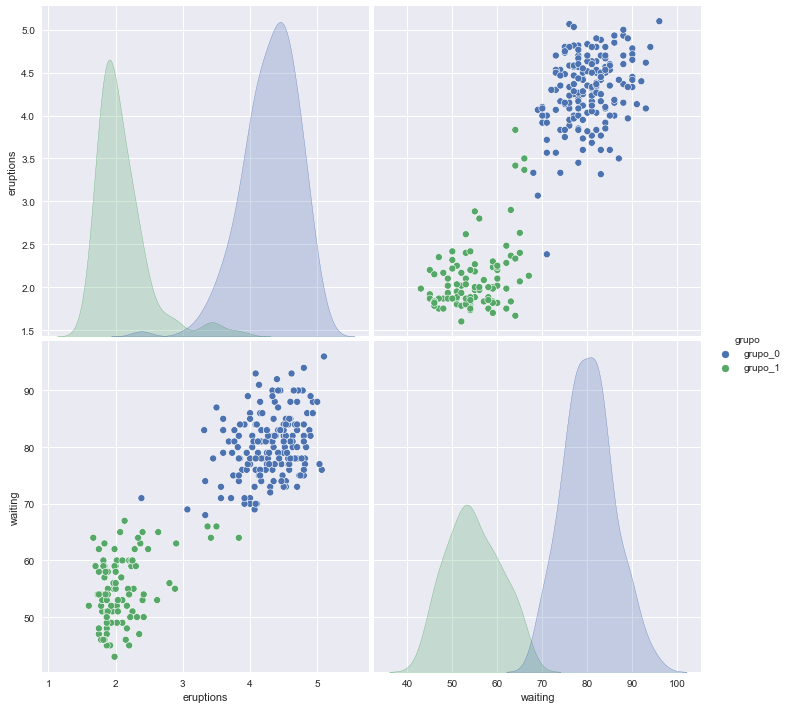

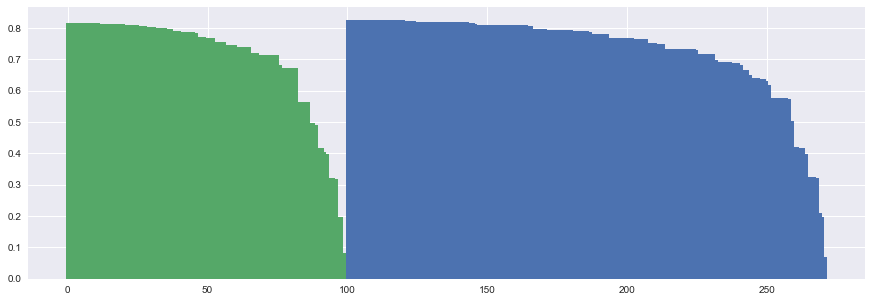

In [11]:
sns.pairplot(eruptions_df[features+['grupo']],hue='grupo',size=5)
grupos = list(eruptions_df['grupo'].unique())
eruptions_df = eruptions_df.sort_values(['grupo','silhouette'],ascending=False)
eruptions_df = eruptions_df.reset_index().reset_index()

plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = eruptions_df[eruptions_df['grupo']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette'],width=1)

los lementos siempre deben ser positivos en el indice de silhoutte 

#### Dendograma de las erupciones

El dendograma era otra medida de bondad de ajuse o de saber el numero de cluster que debe de haber
    - La barra vertical nos dice la distancia entre clusters
    donde haya mayor distancia es el punto de corte que nos dirá el numero de cluster que debiesemos tener

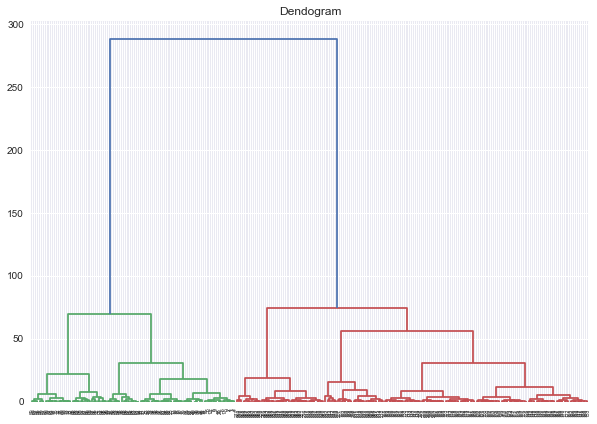

In [13]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(eruptions_df[features], method='ward'))  

**ejempolo 2:** **iris**
____

Retomando el ejemplo de iris donde veiamos que tomando 2 componentes principales podiamos seguir preservando la diferencia entre clases 

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


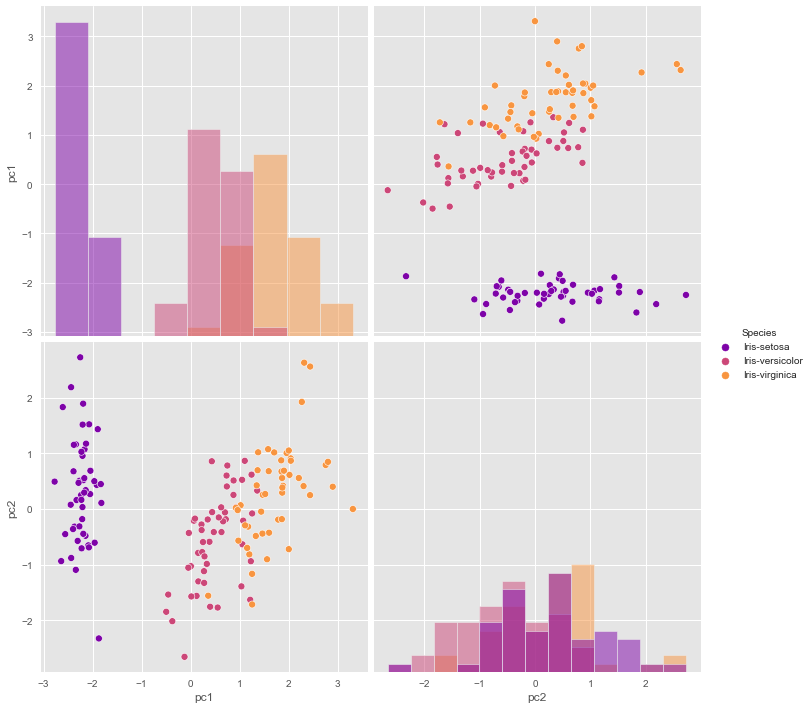

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('ggplot')
import seaborn as sns

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
keys = ['Species']
irisPath = 'DataSets/Iris.csv'
irisPD = pd.read_csv(irisPath)

X = irisPD.loc[:,features].values
Y = irisPD.loc[:,keys].values
ss = StandardScaler(with_mean=True,with_std=True).fit(X)
centeredIrisX = ss.transform(X) 

pd.DataFrame(centeredIrisX)


k=2
pcaIrisCols = ['pc'+str(i+1) for i in range(0,k)]
pcaIrisModel = PCA(n_components=k).fit(centeredIrisX)
transformedIrisDataPD = pd.DataFrame(data=pcaIrisModel.transform(centeredIrisX),columns=pcaIrisCols)
pcaIrisPD = pd.concat([irisPD,transformedIrisDataPD],axis=1)
pcaIrisPD[:5]

smpc = sns.pairplot(pcaIrisPD[keys+pcaIrisCols],hue="Species",diag_kind='hist',palette="plasma",size=5)

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,k,inertia
0,1,574.805852
1,2,198.706836
2,3,116.109240
3,4,89.753124
4,5,66.761041
5,6,57.017421
6,7,47.870047
7,8,40.589890
8,9,32.486554
9,10,28.380364


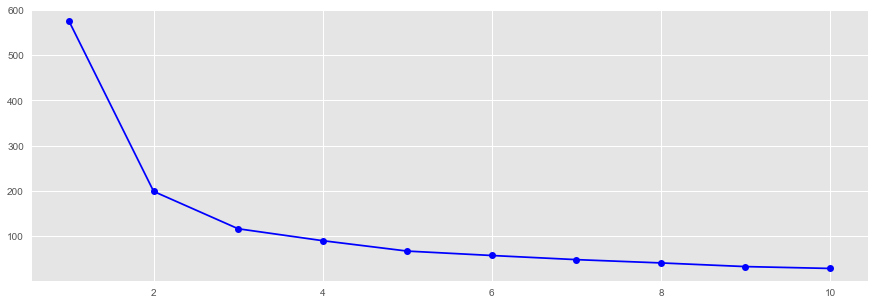

In [16]:
intertias = []
for k in list(range(1,11)):
    kmeans = KMeans(n_clusters=k).fit(pcaIrisPD[pcaIrisCols])
    intertias.append([k,kmeans.inertia_])
intertias_df = pd.DataFrame(intertias,columns=['k','inertia'])
display(intertias_df)
plt.figure(figsize=(15,5))
plt.plot(intertias_df['k'].values,intertias_df['inertia'].values,'b-o')
plt.show()

Derivado del gráfico podríamos decir que el numero de cluster optimo 2, pero como sabemos que hay tres tipos de plantas nos quedaremos con K = 3

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


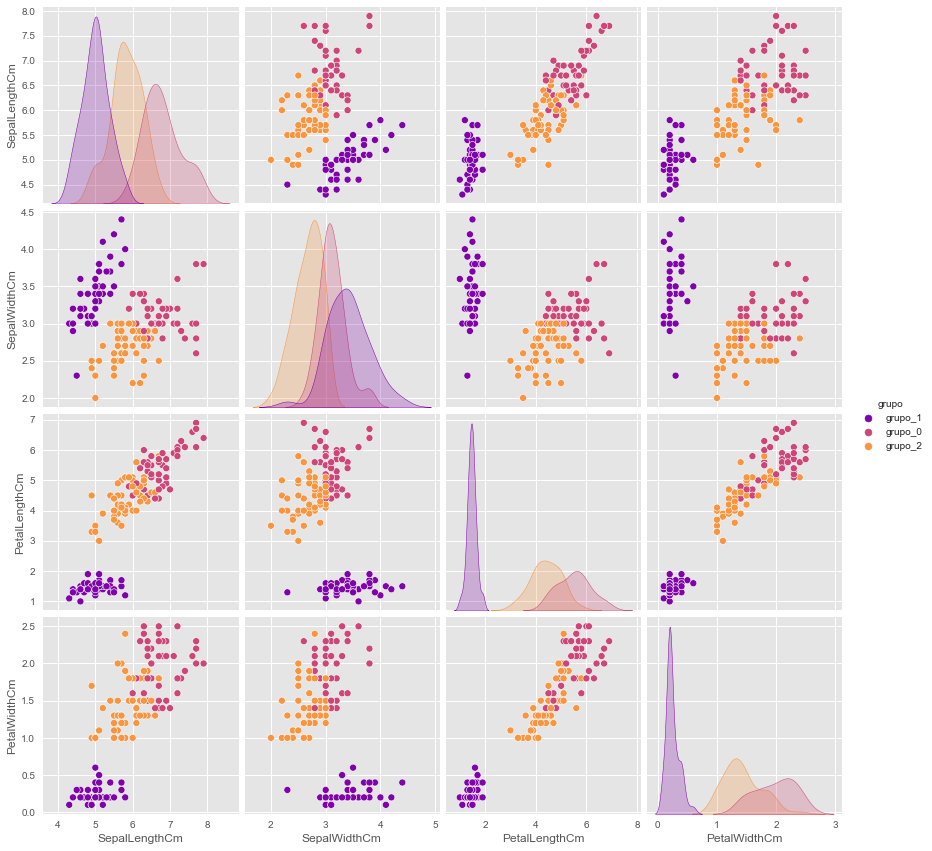

In [17]:
kmeans = KMeans(n_clusters=3).fit(pcaIrisPD[pcaIrisCols])
pcaIrisPD['grupo'] = kmeans.predict(pcaIrisPD[pcaIrisCols])
pcaIrisPD['grupo'] = pcaIrisPD['grupo'].apply(lambda row: 'grupo_'+str(row))
sns.pairplot(pcaIrisPD[features+['grupo']],hue='grupo',size=3,palette="plasma")

In [13]:
pcaIrisPD.groupby(['grupo','Species']).count()

SepalLengthCm  SepalWidthCm  PetalLengthCm  \
grupo   Species                                                       
grupo_0 Iris-versicolor             39            39             39   
        Iris-virginica              14            14             14   
grupo_1 Iris-setosa                 50            50             50   
grupo_2 Iris-versicolor             11            11             11   
        Iris-virginica              36            36             36   

                         PetalWidthCm  pc1  pc2  
grupo   Species                                  
grupo_0 Iris-versicolor            39   39   39  
        Iris-virginica             14   14   14  
grupo_1 Iris-setosa                50   50   50  
grupo_2 Iris-versicolor            11   11   11  
        Iris-virginica             36   36   36

Como podemos ver, el grupo 1 cacha muy bien a todos los Iris setosa 

del grupo 0 podemos ver que el mayor numero de especies que cae ahí son versicolor, por loque podríamos decir que una nueva observación con que tenga características similares a las del grupo 0 es versicolor 

y analogamente para el grupo 2 diriamos que se asigna Virginica

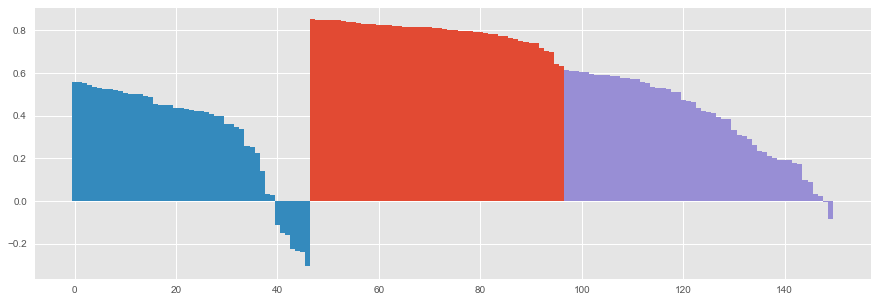

In [14]:
grupos = list(pcaIrisPD['grupo'].unique())
pcaIrisPD['silhouette'] = silhouette_samples(pcaIrisPD[features], pcaIrisPD['grupo'])
pcaIrisPD = pcaIrisPD.sort_values(['grupo','silhouette'],ascending=False)
pcaIrisPD = pcaIrisPD.reset_index().reset_index()
#pcaIrisPD['grupo'] = pcaIrisPD['grupo'].apply(lambda row: np.random.choice(['grupo_0','grupo_1']))
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = pcaIrisPD[pcaIrisPD['grupo']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette'],width=1)

Observando el indice de silhoutte podemos ver que hay observaciones que no se parecen a su grupo

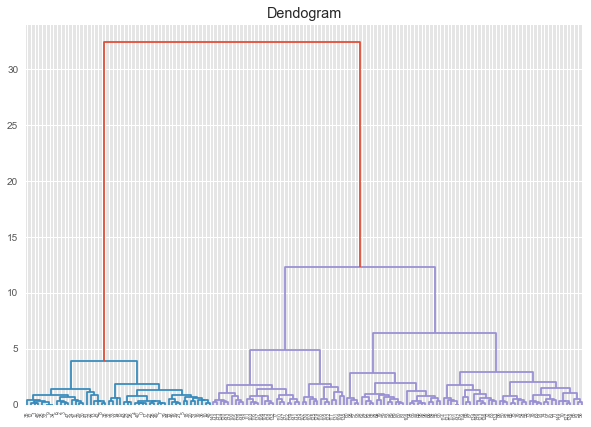

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(pcaIrisPD[features], method='ward'))  

Del dendograma anterior podemo ver un grupo muy bien definido donde seguramente todos son iris setosa, de igual forma en el dendograma podemos ver que el numero optimo de cluster debiese ser tres

In [19]:
X_new = [[1,2,1,1]]
X_new_std = ss.transform(X=X_new)
X_new_pca = pcaIrisModel.transform(X_new_std)
X_grupo = kmeans.predict(pd.DataFrame(X_new_pca,columns=['pc1','pc2']))
X_grupo

array([1])

**Distancia de levenshtein 3:**

,0,foo
0,mono,1
1,tono,1
2,lomo,1
3,domo,1
4,cono,1
5,raiz,1
6,maiz,1
7,nariz,1
8,pais,1


array([['mono', 'mono'],
       ['mono', 'tono'],
       ['mono', 'lomo'],
       ['mono', 'domo'],
       ['mono', 'cono'],
       ['mono', 'raiz'],
       ['mono', 'maiz'],
       ['mono', 'nariz'],
       ['mono', 'pais'],
       ['tono', 'mono'],
       ['tono', 'tono'],
       ['tono', 'lomo'],
       ['tono', 'domo'],
       ['tono', 'cono'],
       ['tono', 'raiz'],
       ['tono', 'maiz'],
       ['tono', 'nariz'],
       ['tono', 'pais'],
       ['lomo', 'mono'],
       ['lomo', 'tono'],
       ['lomo', 'lomo'],
       ['lomo', 'domo'],
       ['lomo', 'cono'],
       ['lomo', 'raiz'],
       ['lomo', 'maiz'],
       ['lomo', 'nariz'],
       ['lomo', 'pais'],
       ['domo', 'mono'],
       ['domo', 'tono'],
       ['domo', 'lomo'],
       ['domo', 'domo'],
       ['domo', 'cono'],
       ['domo', 'raiz'],
       ['domo', 'maiz'],
       ['domo', 'nariz'],
       ['domo', 'pais'],
       ['cono', 'mono'],
       ['cono', 'tono'],
       ['cono', 'lomo'],
       ['cono', 'domo

array([['mono', 'mono'],
       ['mono', 'tono'],
       ['mono', 'lomo'],
       ['mono', 'domo'],
       ['mono', 'cono'],
       ['mono', 'raiz'],
       ['mono', 'maiz'],
       ['mono', 'nariz'],
       ['mono', 'pais'],
       ['tono', 'mono'],
       ['tono', 'tono'],
       ['tono', 'lomo'],
       ['tono', 'domo'],
       ['tono', 'cono'],
       ['tono', 'raiz'],
       ['tono', 'maiz'],
       ['tono', 'nariz'],
       ['tono', 'pais'],
       ['lomo', 'mono'],
       ['lomo', 'tono'],
       ['lomo', 'lomo'],
       ['lomo', 'domo'],
       ['lomo', 'cono'],
       ['lomo', 'raiz'],
       ['lomo', 'maiz'],
       ['lomo', 'nariz'],
       ['lomo', 'pais'],
       ['domo', 'mono'],
       ['domo', 'tono'],
       ['domo', 'lomo'],
       ['domo', 'domo'],
       ['domo', 'cono'],
       ['domo', 'raiz'],
       ['domo', 'maiz'],
       ['domo', 'nariz'],
       ['domo', 'pais'],
       ['cono', 'mono'],
       ['cono', 'tono'],
       ['cono', 'lomo'],
       ['cono', 'domo

levenshtein                                         
word2        cono domo lomo maiz mono nariz pais raiz tono
word1                                                     
cono            0    2    2    4    1     5    4    4    1
domo            2    0    1    4    2     5    4    4    2
lomo            2    1    0    4    2     5    4    4    2
maiz            4    4    4    0    3     2    2    1    4
mono            1    2    2    3    0     5    4    4    1
nariz           5    5    5    2    5     0    3    2    5
pais            4    4    4    2    4     3    0    2    4
raiz            4    4    4    1    4     2    2    0    4
tono            1    2    2    4    1     5    4    4    0

,word,x1,x2
0,cono,-2.115673,-0.215394
1,domo,-1.399319,1.580180
2,lomo,-1.752743,1.298461
3,maiz,1.824294,-0.258448
4,mono,-1.507451,-0.334011
5,nariz,2.906822,-1.710077
6,pais,2.093969,1.209636
7,raiz,1.890561,-0.794160
8,tono,-1.940461,-0.776187


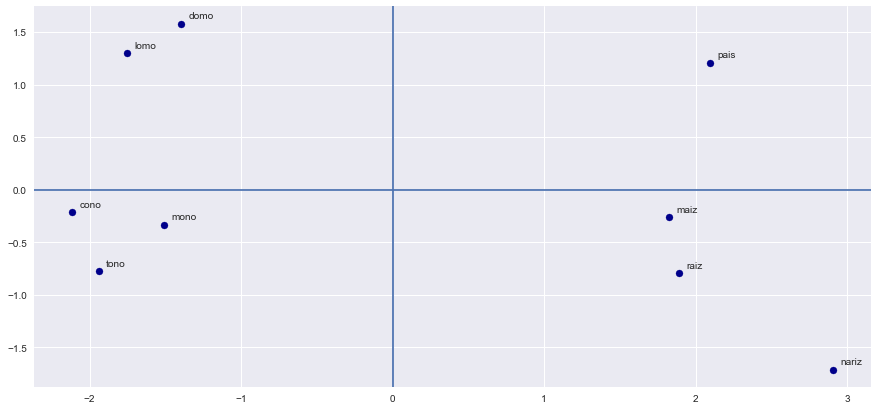

In [20]:
def levenshtein(str1, str2):
  d=dict()
  for i in range(len(str1)+1):
     d[i]=dict()
     d[i][0]=i
  for i in range(len(str2)+1):
     d[0][i] = i
  for i in range(1, len(str1)+1):
     for j in range(1, len(str2)+1):
        d[i][j] = min(d[i][j-1]+1, d[i-1][j]+1, d[i-1][j-1]+(not str1[i-1] == str2[j-1]))
  return d[len(str1)][len(str2)]

words = ['looney','coney','money','donkey','honey','mark','park','dark','shark','spark']
words = ['mono','tono','lomo','domo','cono','raiz','maiz','nariz','pais']

cols=['word1','word2','levenshtein']

wordsPD =  pd.DataFrame(words).assign(foo=1)
display(wordsPD)
cartesian = wordsPD.merge(wordsPD,on='foo').drop('foo', 1).values
display(cartesian)
distances = map(lambda x: [x[0],x[1],levenshtein(x[0],x[1])], cartesian)
display(cartesian)
distanceMatrixDF = pd.DataFrame(list(distances),columns=cols)\
                     .pivot(index='word1',columns='word2')

display(distanceMatrixDF)

cols = ['x1','x2']
mdsWordsVectors = manifold.MDS(n_components=2,dissimilarity='precomputed',random_state=5)\
                     .fit_transform(distanceMatrixDF.values)

mapWordsPD = pd.DataFrame(mdsWordsVectors,columns=cols)
mapWordsPD['word'] = list(distanceMatrixDF.reset_index()['word1'])

display(mapWordsPD[['word','x1','x2']])

plt.style.use('seaborn')
plt.figure(figsize=(15,7))
scatterPlot(plt,mapWordsPD,'x1','x2','darkblue',label='word')

,x1,x2,word,grupo,silhouette
0,-2.115673,-0.215394,cono,grupo_1,0.734211
1,-1.399319,1.580180,domo,grupo_1,0.597609
2,-1.752743,1.298461,lomo,grupo_1,0.671790
3,1.824294,-0.258448,maiz,grupo_0,0.657192
4,-1.507451,-0.334011,mono,grupo_1,0.685919
5,2.906822,-1.710077,nariz,grupo_0,0.598330
6,2.093969,1.209636,pais,grupo_0,0.461134
7,1.890561,-0.794160,raiz,grupo_0,0.665929
8,-1.940461,-0.776187,tono,grupo_1,0.665546


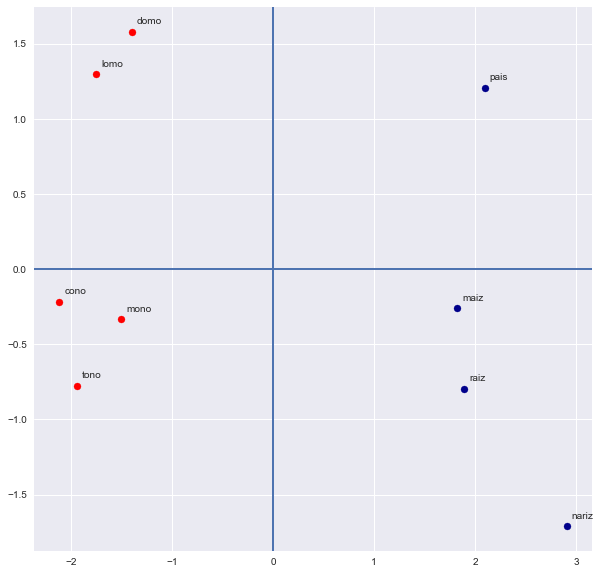

In [21]:
features = ['x1','x2']
kmeans = KMeans(n_clusters=2).fit(mapWordsPD[features]) # es claro ver que hay dos grupos
mapWordsPD['grupo'] = kmeans.predict(mapWordsPD[features])


mapWordsPD['grupo'] = mapWordsPD['grupo'].apply(lambda row: 'grupo_'+str(row))
mapWordsPD['silhouette'] = silhouette_samples(mapWordsPD[features], mapWordsPD['grupo'])
plt.figure(figsize=(10,10))
scatterPlot(plt,mapWordsPD[mapWordsPD['grupo']=='grupo_0'],'x1','x2','darkblue',label='word')
scatterPlot(plt,mapWordsPD[mapWordsPD['grupo']=='grupo_1'],'x1','x2','red',label='word')
mapWordsPD

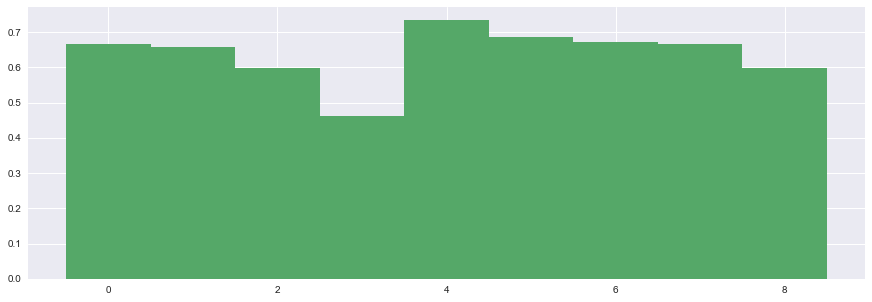

In [19]:
grupos = list(mapWordsPD['grupo'].unique())
mapWordsPD_s = mapWordsPD.sort_values(['grupo','silhouette'],ascending=False)
mapWordsPD_s = mapWordsPD_s.reset_index().reset_index()
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = mapWordsPD_s[mapWordsPD_s['grupo']==grupo]
    plt.bar(mapWordsPD_s['level_0'],mapWordsPD_s['silhouette'],width=1)

del grafico anterior de silgoutte podemos ver que todas las observaciones se parecen a su grupo

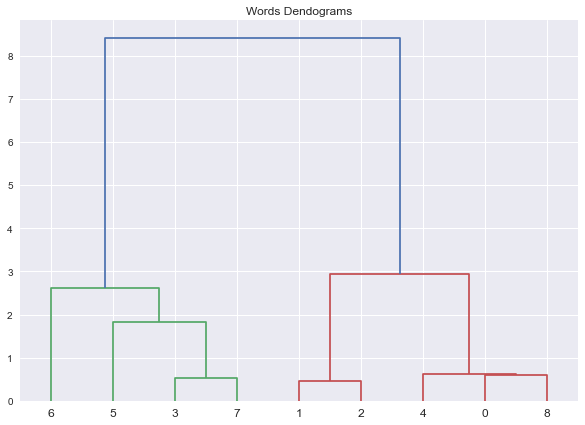

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Words Dendograms")
dend = shc.dendrogram(shc.linkage(mapWordsPD[features], method='ward'))

Viendo el dendograma es claro ver sólo hay dos grupos